# Proyecto 3 - Ataques a modelos de Deep Learning
Security Data Science

Sergio Marchena - 16387

UVG

In [35]:
import numpy as np
import pandas as pd
import os
from tensorflow.keras import datasets, layers, models
from keras.layers import Dense, Dropout, Flatten
from keras.models import model_from_json
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Flatten, InputLayer, Reshape
from sklearn import metrics
import seaborn as sns

## 1. Se debe mostrar un entrenamiento y predicción del modelo original 

In [36]:
dir = 'malimg_paper_dataset_imgs'
batches = ImageDataGenerator().flow_from_directory(directory=dir, target_size=(64,64), batch_size=10000)
imgs, labels = next(batches)

Found 9339 images belonging to 25 classes.


In [85]:
x_train, x_test, y_train, y_test = train_test_split(imgs/255.,labels, test_size=0.45)


print('x_train:', x_train.shape)
print('x_test: ', x_test.shape)

print('y_train:', x_train.shape)
print('y_test: ', x_test.shape)

x_train: (5136, 64, 64, 3)
x_test:  (4203, 64, 64, 3)
y_train: (5136, 64, 64, 3)
y_test:  (4203, 64, 64, 3)


In [38]:
num_classes = 25 # classes

def modelo1():
    # sequential model
    modelo = Sequential()
    modelo.add(Conv2D(30, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(64,64,3)))

    modelo.add(MaxPooling2D(pool_size=(2, 2)))
    modelo.add(Conv2D(15, (3, 3), activation='relu'))
    modelo.add(MaxPooling2D(pool_size=(2, 2)))
    modelo.add(Dropout(0.25))
    modelo.add(Flatten())
    modelo.add(Dense(128, activation='relu'))
    modelo.add(Dropout(0.5))
    modelo.add(Dense(50, activation='relu'))
    modelo.add(Dense(num_classes, activation='softmax'))
    modelo.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    return modelo

In [39]:
modelo_seq = modelo1()

In [40]:
modelo_seq.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 30)        840       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 31, 31, 30)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 15)        4065      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 15)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 14, 14, 15)        0         
                                                                 
 flatten_3 (Flatten)         (None, 2940)             

In [41]:
# extract only classes
y_train_new = np.argmax(y_train, axis=1)
y_train_new

array([ 2,  2, 22, ..., 23,  2, 15])

In [42]:
# training
modelo_seq.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Train on 5136 samples, validate on 4203 samples
Epoch 1/10


2022-05-30 13:55:37.223338: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 13:55:37.267290: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 13:55:37.336064: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 13:55:37.347169: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5136/5136 [==============================] - ETA: 0s - loss: 1.8451 - accuracy: 0.4480

/Users/sergiomarchena/miniforge3/envs/MLvenv/lib/python3.8/site-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
2022-05-30 13:55:42.352933: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5136/5136 [==============================] - 6s 1ms/sample - loss: 1.8451 - accuracy: 0.4480 - val_loss: 1.0220 - val_accuracy: 0.6629
Epoch 2/10
5136/5136 [==============================] - 5s 999us/sample - loss: 0.8635 - accuracy: 0.6980 - val_loss: 0.6555 - val_accuracy: 0.7523
Epoch 3/10
5136/5136 [==============================] - 5s 979us/sample - loss: 0.5446 - accuracy: 0.8298 - val_loss: 0.3609 - val_accuracy: 0.8972
Epoch 4/10
5136/5136 [==============================] - 5s 981us/sample - loss: 0.3525 - accuracy: 0.8964 - val_loss: 0.2643 - val_accuracy: 0.9198
Epoch 5/10
5136/5136 [==============================] - 5s 1ms/sample - loss: 0.2793 - accuracy: 0.9137 - val_loss: 0.2266 - val_accuracy: 0.9291
Epoch 6/10
5136/5136 [==============================] - 5s 1ms/sample - loss: 0.2362 - accuracy: 0.9246 - val_loss: 0.2138 - val_accuracy: 0.9367
Epoch 7/10
5136/5136 [==============================] - 5s 1ms/sample - loss: 0.2249 - accuracy: 0.9293 - val_loss: 0.1916 - val_

In [43]:
scores = modelo_seq.evaluate(x_test, y_test)

In [44]:
print('Accuracy CNN: %0.2f' % (scores[1]*100))

Accuracy CNN: 93.89


In [45]:
# saving model as h5 format
modelo_seq.save('modelo_creado.h5')

2022-05-30 13:56:31.027571: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 13:56:31.036285: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 13:56:31.044424: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 13:56:31.060585: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 13:56:31.074767: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 13:56:31.086593: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 13:56:31.096625: I tensorflow/core/grappler/optimizers/cust

## 2. Se  debe  crear  un  modelo  robado  a  partir  del  modelo  original,  entrenado  con  data completamente aleatoria, con los ataques Copycat CNN y KnockoffNets. 

In [46]:
import art
from art.attacks import ExtractionAttack
from art.attacks.extraction import CopycatCNN, KnockoffNets
from art.estimators.classification import KerasClassifier
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Flatten, InputLayer, Reshape

from tensorflow.keras.models import load_model
from art.utils import load_dataset, get_file
from art import config

tf.compat.v1.disable_eager_execution() 
print(tf.executing_eagerly())
import sys
print(sys.getrecursionlimit())

False
3000


In [47]:
# loading model
loaded_model = keras.models.load_model('modelo_creado.h5')

2022-05-30 13:56:31.359215: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 13:56:31.397635: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 13:56:31.445398: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 13:56:31.598572: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 13:56:31.645912: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 13:56:31.673133: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 13:56:31.744986: I tensorflow/core/grappler/optimizers/cust

In [48]:
classifier_original = KerasClassifier(loaded_model, clip_values=(0, 1), use_logits=False)

In [49]:
num_epochs = 10 
len_steal = 5000 
# Stealing from the unprotected classifier.
attack_catalogue = {"Probabilistic CopycatCNN": CopycatCNN(classifier=classifier_original,
                                              batch_size_fit=64,
                                              batch_size_query=64,
                                              nb_epochs=num_epochs,
                                              nb_stolen=len_steal,
                                              use_probability=True),
                    "Argmax CopycatCNN": CopycatCNN(classifier=classifier_original,
                                              batch_size_fit=64,
                                              batch_size_query=64,
                                              nb_epochs=num_epochs,
                                              nb_stolen=len_steal,
                                              use_probability=False),
                    "Probabilistic KnockoffNets": KnockoffNets(classifier=classifier_original,
                                              batch_size_fit=64,
                                              batch_size_query=64,
                                              nb_epochs=num_epochs,
                                              nb_stolen=len_steal,
                                              use_probability=True),
                    "Argmax KnockoffNets": KnockoffNets(classifier=classifier_original,
                                              batch_size_fit=64,
                                              batch_size_query=64,
                                              nb_epochs=num_epochs,
                                              nb_stolen=len_steal,
                                              use_probability=False),
                   }

In [78]:
# new model (from stealed data)
def stealed_model():
    model = Sequential(Conv2D(30, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(64,64,3)))
   
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    return model

In [79]:
results = []
for len_steal in [250, 500, 1000, 2000, 3000, 4000]:
    indices = np.random.permutation(len(x_test))
    x_steal = x_test[indices[:len_steal]]
    y_steal = y_test[indices[:len_steal]]
    x_test = x_test[indices[len_steal:]]
    y_test = y_test[indices[len_steal:]]

    for name, attack in attack_catalogue.items():
        model_stolen = stealed_model()
        classifier_stolen = KerasClassifier(model_stolen, clip_values=(0, 1), use_logits=False)
        classifier_stolen = attack.extract(x_steal, y_steal, thieved_classifier=classifier_stolen)
        acc = classifier_stolen._model.evaluate(x_test, y_test)[1]
        print(name, ":", acc)
        results.append((name, len_steal, acc))

2022-05-30 14:21:11.822331: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:21:12.008075: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:21:12.588890: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Train on 250 samples
Epoch 1/10


2022-05-30 14:21:13.060416: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:21:13.191103: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:21:13.233446: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:21:13.260569: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


250/250 [==============================] - 1s 3ms/sample - loss: 2.9357 - accuracy: 0.2600
Epoch 2/10
250/250 [==============================] - 0s 457us/sample - loss: 2.6086 - accuracy: 0.3320
Epoch 3/10
250/250 [==============================] - 0s 498us/sample - loss: 2.4621 - accuracy: 0.3320
Epoch 4/10
250/250 [==============================] - 0s 843us/sample - loss: 2.3340 - accuracy: 0.3600
Epoch 5/10
250/250 [==============================] - 0s 748us/sample - loss: 2.2221 - accuracy: 0.3880
Epoch 6/10
250/250 [==============================] - 0s 696us/sample - loss: 2.1548 - accuracy: 0.4120
Epoch 7/10
250/250 [==============================] - 0s 707us/sample - loss: 2.0333 - accuracy: 0.4160
Epoch 8/10
250/250 [==============================] - 0s 798us/sample - loss: 1.9317 - accuracy: 0.4440
Epoch 9/10
250/250 [==============================] - 0s 721us/sample - loss: 1.8862 - accuracy: 0.4400
Epoch 10/10
250/250 [==============================] - 0s 876us/sample - loss

/Users/sergiomarchena/miniforge3/envs/MLvenv/lib/python3.8/site-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
2022-05-30 14:21:15.787505: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Probabilistic CopycatCNN : 0.39741972


2022-05-30 14:21:17.181945: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:21:17.323711: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Train on 250 samples


2022-05-30 14:21:17.737107: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:21:17.889630: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:21:17.933702: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/10


2022-05-30 14:21:17.963929: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


250/250 [==============================] - 0s 1ms/sample - loss: 2.6817 - accuracy: 0.3400
Epoch 2/10
250/250 [==============================] - 0s 651us/sample - loss: 2.4835 - accuracy: 0.3120
Epoch 3/10
250/250 [==============================] - 0s 445us/sample - loss: 2.3724 - accuracy: 0.3160
Epoch 4/10
250/250 [==============================] - 0s 437us/sample - loss: 2.2294 - accuracy: 0.3520
Epoch 5/10
250/250 [==============================] - 0s 455us/sample - loss: 2.1387 - accuracy: 0.3560
Epoch 6/10
250/250 [==============================] - 0s 516us/sample - loss: 1.9794 - accuracy: 0.4040
Epoch 7/10
250/250 [==============================] - 0s 865us/sample - loss: 1.9160 - accuracy: 0.3960
Epoch 8/10
250/250 [==============================] - 0s 835us/sample - loss: 1.8131 - accuracy: 0.4360
Epoch 9/10
250/250 [==============================] - 0s 787us/sample - loss: 1.6989 - accuracy: 0.4600
Epoch 10/10
250/250 [==============================] - 0s 700us/sample - loss

2022-05-30 14:21:19.923176: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Argmax CopycatCNN : 0.45307365


2022-05-30 14:21:21.281930: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:21:21.437686: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:21:21.868442: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:21:22.039811: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:21:22.088481: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:21:22.121631: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:21:23.819965: I tensorflow/core/grappler/optimizers/cust

Probabilistic KnockoffNets : 0.4533266


2022-05-30 14:21:25.242885: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:21:25.422003: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:21:25.873376: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:21:26.068116: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:21:26.119816: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:21:26.156184: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:21:28.101795: I tensorflow/core/grappler/optimizers/cust

Argmax KnockoffNets : 0.39741972


2022-05-30 14:21:29.590653: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:21:29.789080: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Train on 500 samples


2022-05-30 14:21:30.507685: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/10


2022-05-30 14:21:30.720251: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:21:30.776890: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:21:30.817718: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


500/500 [==============================] - 1s 2ms/sample - loss: 2.8080 - accuracy: 0.2740
Epoch 2/10
500/500 [==============================] - 0s 488us/sample - loss: 2.5216 - accuracy: 0.3340
Epoch 3/10
500/500 [==============================] - 0s 905us/sample - loss: 2.3710 - accuracy: 0.3800
Epoch 4/10
500/500 [==============================] - 0s 676us/sample - loss: 2.1922 - accuracy: 0.4280
Epoch 5/10
500/500 [==============================] - 0s 674us/sample - loss: 2.0534 - accuracy: 0.4420
Epoch 6/10
500/500 [==============================] - 0s 726us/sample - loss: 1.9002 - accuracy: 0.4820
Epoch 7/10
500/500 [==============================] - 0s 709us/sample - loss: 1.7838 - accuracy: 0.4680
Epoch 8/10
500/500 [==============================] - 0s 683us/sample - loss: 1.6132 - accuracy: 0.5380
Epoch 9/10
500/500 [==============================] - 0s 698us/sample - loss: 1.4942 - accuracy: 0.5680
Epoch 10/10
500/500 [==============================] - 0s 710us/sample - loss

2022-05-30 14:21:35.068646: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Probabilistic CopycatCNN : 0.5774689


2022-05-30 14:21:36.486264: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:21:36.708546: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Train on 500 samples


2022-05-30 14:21:37.249900: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/10


2022-05-30 14:21:37.487518: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:21:37.547438: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:21:37.592857: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


500/500 [==============================] - 1s 1ms/sample - loss: 2.9278 - accuracy: 0.2260
Epoch 2/10
500/500 [==============================] - 0s 688us/sample - loss: 2.5764 - accuracy: 0.3420
Epoch 3/10
500/500 [==============================] - 0s 787us/sample - loss: 2.3217 - accuracy: 0.3820
Epoch 4/10
500/500 [==============================] - 0s 666us/sample - loss: 2.1824 - accuracy: 0.4100
Epoch 5/10
500/500 [==============================] - 0s 755us/sample - loss: 1.9358 - accuracy: 0.4440
Epoch 6/10
500/500 [==============================] - 0s 747us/sample - loss: 1.7799 - accuracy: 0.4820
Epoch 7/10
500/500 [==============================] - 0s 879us/sample - loss: 1.6370 - accuracy: 0.5100
Epoch 8/10
500/500 [==============================] - 0s 668us/sample - loss: 1.4508 - accuracy: 0.5640
Epoch 9/10
500/500 [==============================] - 0s 751us/sample - loss: 1.3758 - accuracy: 0.5720
Epoch 10/10
500/500 [==============================] - 0s 698us/sample - loss

2022-05-30 14:21:41.756753: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Argmax CopycatCNN : 0.6041124


2022-05-30 14:21:43.182360: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:21:43.425205: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:21:43.986045: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:21:44.239070: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:21:44.302186: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:21:44.349970: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:21:48.032944: I tensorflow/core/grappler/optimizers/cust

Probabilistic KnockoffNets : 0.5942659


2022-05-30 14:21:49.547831: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:21:49.805476: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:21:50.388577: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:21:50.660471: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:21:50.730190: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:21:50.781371: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:21:54.388091: I tensorflow/core/grappler/optimizers/cust

Argmax KnockoffNets : 0.61135244


2022-05-30 14:21:55.967642: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:21:56.261129: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Train on 1000 samples


2022-05-30 14:21:57.937191: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/10


2022-05-30 14:21:58.242862: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:21:58.314558: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:21:58.375126: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1000/1000 [==============================] - 2s 2ms/sample - loss: 2.8153 - accuracy: 0.3000
Epoch 2/10
1000/1000 [==============================] - 1s 639us/sample - loss: 2.4164 - accuracy: 0.3420
Epoch 3/10
1000/1000 [==============================] - 1s 717us/sample - loss: 2.0626 - accuracy: 0.4440
Epoch 4/10
1000/1000 [==============================] - 1s 718us/sample - loss: 1.7545 - accuracy: 0.5000
Epoch 5/10
1000/1000 [==============================] - 1s 696us/sample - loss: 1.4566 - accuracy: 0.5760
Epoch 6/10
1000/1000 [==============================] - 1s 752us/sample - loss: 1.2238 - accuracy: 0.6460
Epoch 7/10
1000/1000 [==============================] - 1s 709us/sample - loss: 1.0544 - accuracy: 0.7010
Epoch 8/10
1000/1000 [==============================] - 1s 811us/sample - loss: 0.9644 - accuracy: 0.7030
Epoch 9/10
1000/1000 [==============================] - 1s 752us/sample - loss: 0.8280 - accuracy: 0.7550
Epoch 10/10
1000/1000 [==============================] - 1s

2022-05-30 14:22:06.802860: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Probabilistic CopycatCNN : 0.8226661


2022-05-30 14:22:08.184679: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:22:08.491748: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Train on 1000 samples


2022-05-30 14:22:09.196050: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/10


2022-05-30 14:22:09.517184: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:22:09.591994: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:22:09.652436: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1000/1000 [==============================] - 1s 1ms/sample - loss: 2.7131 - accuracy: 0.2960
Epoch 2/10
1000/1000 [==============================] - 1s 699us/sample - loss: 2.2511 - accuracy: 0.3880
Epoch 3/10
1000/1000 [==============================] - 1s 673us/sample - loss: 1.8035 - accuracy: 0.4590
Epoch 4/10
1000/1000 [==============================] - 1s 932us/sample - loss: 1.5157 - accuracy: 0.5190
Epoch 5/10
1000/1000 [==============================] - 1s 811us/sample - loss: 1.2631 - accuracy: 0.5930
Epoch 6/10
1000/1000 [==============================] - 1s 819us/sample - loss: 1.1003 - accuracy: 0.6560
Epoch 7/10
1000/1000 [==============================] - 1s 752us/sample - loss: 0.9864 - accuracy: 0.6870
Epoch 8/10
1000/1000 [==============================] - 1s 738us/sample - loss: 0.8782 - accuracy: 0.7240
Epoch 9/10
1000/1000 [==============================] - 1s 904us/sample - loss: 0.7451 - accuracy: 0.7530
Epoch 10/10
1000/1000 [==============================] - 1s

2022-05-30 14:22:18.130687: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Argmax CopycatCNN : 0.73583364


2022-05-30 14:22:19.598388: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:22:19.929663: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:22:20.699833: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:22:21.060574: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:22:21.144350: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:22:21.209272: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:22:28.433330: I tensorflow/core/grappler/optimizers/cust

Probabilistic KnockoffNets : 0.7639625


2022-05-30 14:22:29.957296: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:22:30.324222: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:22:31.281247: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:22:31.707290: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:22:31.787562: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:22:31.855845: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:22:39.737093: I tensorflow/core/grappler/optimizers/cust

Argmax KnockoffNets : 0.77863836


2022-05-30 14:22:41.380951: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:22:41.805879: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Train on 2000 samples


2022-05-30 14:22:42.933511: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/10


2022-05-30 14:22:43.353494: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:22:43.453219: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:22:43.527102: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2000/2000 [==============================] - 2s 1ms/sample - loss: 2.5315 - accuracy: 0.3220
Epoch 2/10
2000/2000 [==============================] - 1s 658us/sample - loss: 1.8490 - accuracy: 0.4535
Epoch 3/10
2000/2000 [==============================] - 2s 796us/sample - loss: 1.3874 - accuracy: 0.5675
Epoch 4/10
2000/2000 [==============================] - 1s 738us/sample - loss: 1.0902 - accuracy: 0.6430
Epoch 5/10
2000/2000 [==============================] - 2s 804us/sample - loss: 0.8454 - accuracy: 0.7260
Epoch 6/10
2000/2000 [==============================] - 2s 750us/sample - loss: 0.7215 - accuracy: 0.7740
Epoch 7/10
2000/2000 [==============================] - 2s 793us/sample - loss: 0.6261 - accuracy: 0.8115
Epoch 8/10
2000/2000 [==============================] - 2s 878us/sample - loss: 0.5267 - accuracy: 0.8630
Epoch 9/10
2000/2000 [==============================] - 1s 680us/sample - loss: 0.4561 - accuracy: 0.8835
Epoch 10/10
2000/2000 [==============================] - 1s

2022-05-30 14:22:59.597387: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Probabilistic CopycatCNN : 0.9050773


2022-05-30 14:23:00.982825: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:23:01.377505: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Train on 2000 samples


2022-05-30 14:23:02.544990: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/10


2022-05-30 14:23:02.956078: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:23:03.048633: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:23:03.122221: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2000/2000 [==============================] - 2s 875us/sample - loss: 2.4428 - accuracy: 0.3185
Epoch 2/10
2000/2000 [==============================] - 1s 730us/sample - loss: 1.7659 - accuracy: 0.4415
Epoch 3/10
2000/2000 [==============================] - 1s 722us/sample - loss: 1.3773 - accuracy: 0.5245
Epoch 4/10
2000/2000 [==============================] - 1s 672us/sample - loss: 1.0434 - accuracy: 0.6390
Epoch 5/10
2000/2000 [==============================] - 1s 670us/sample - loss: 0.7976 - accuracy: 0.7355
Epoch 6/10
2000/2000 [==============================] - 1s 673us/sample - loss: 0.6583 - accuracy: 0.7960
Epoch 7/10
2000/2000 [==============================] - 1s 679us/sample - loss: 0.4941 - accuracy: 0.8540
Epoch 8/10
2000/2000 [==============================] - 1s 681us/sample - loss: 0.3855 - accuracy: 0.8950
Epoch 9/10
2000/2000 [==============================] - 1s 674us/sample - loss: 0.2917 - accuracy: 0.9140
Epoch 10/10
2000/2000 [==============================] - 

2022-05-30 14:23:17.677874: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Argmax CopycatCNN : 0.9072848


2022-05-30 14:23:18.742690: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:23:19.161430: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:23:20.248513: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:23:20.677119: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:23:20.769932: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:23:20.852501: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:23:36.804954: I tensorflow/core/grappler/optimizers/cust

Probabilistic KnockoffNets : 0.9161148


2022-05-30 14:23:37.946704: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:23:38.385886: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:23:39.537134: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:23:40.081989: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:23:40.180365: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:23:40.276066: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:23:55.347554: I tensorflow/core/grappler/optimizers/cust

Argmax KnockoffNets : 0.9072848


2022-05-30 14:23:56.367542: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:23:56.822275: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Train on 453 samples


2022-05-30 14:23:57.773181: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/10


2022-05-30 14:23:58.248979: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:23:58.352528: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:23:58.443011: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


453/453 [==============================] - 1s 2ms/sample - loss: 2.9294 - accuracy: 0.1656
Epoch 2/10
453/453 [==============================] - 0s 596us/sample - loss: 2.6422 - accuracy: 0.2627
Epoch 3/10
453/453 [==============================] - 0s 545us/sample - loss: 2.4577 - accuracy: 0.2781
Epoch 4/10
453/453 [==============================] - 0s 722us/sample - loss: 2.2700 - accuracy: 0.3466
Epoch 5/10
453/453 [==============================] - 0s 811us/sample - loss: 2.0522 - accuracy: 0.4062
Epoch 6/10
453/453 [==============================] - 0s 916us/sample - loss: 1.9474 - accuracy: 0.4327
Epoch 7/10
453/453 [==============================] - 0s 788us/sample - loss: 1.8474 - accuracy: 0.4614
Epoch 8/10
453/453 [==============================] - 0s 875us/sample - loss: 1.7023 - accuracy: 0.4724
Epoch 9/10
453/453 [==============================] - 0s 812us/sample - loss: 1.5411 - accuracy: 0.5166
Epoch 10/10
453/453 [==============================] - 0s 738us/sample - loss

ValueError: Empty training data.

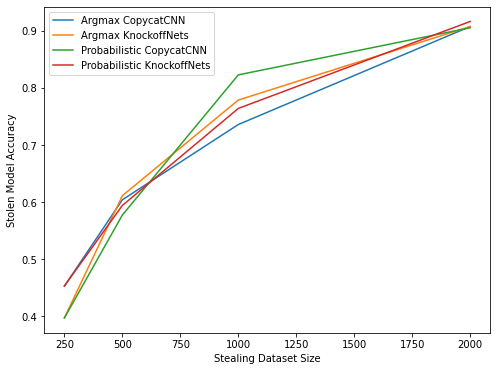

In [80]:
# gráfica el accuracy del modelo robado, contra el tamaño del dataset 
df = pd.DataFrame(results, columns=('Method Name', 'Stealing Dataset Size', 'Accuracy'))
fig, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel("Stealing Dataset Size")
ax.set_ylabel("Stolen Model Accuracy")
for name, group in df.groupby("Method Name"):
    group.plot(1, 2, ax=ax, label=name)
plt.show()

Para los modelos probabilisticos, el ataque KnockoffNets llega a tener un accuracy mas alto que el CopycatCNN. Mientras que en los no probablisticos (argmax), son muy parecidos, aunque KnockoffNets es un poco mas accurate. 

In [82]:
# capa de defensa
from art.defences.postprocessor import ReverseSigmoid

postprocessor = ReverseSigmoid(beta = 1.0, gamma = 0.2)
classifier_protected = KerasClassifier(loaded_model, clip_values=(0, 1), use_logits=False, postprocessing_defences=postprocessor)

# En la siguiente parte se usa `FunctionallyEquivalentExtraction` pero toma demasiado tiempo
model_flat = Sequential([InputLayer([64, 64, 3]), Reshape([64, 64, 3]), loaded_model])
model_flat.compile('sgd', 'categorical_crossentropy', ['accuracy'])
classifier_flat_protected = KerasClassifier(model_flat, clip_values=(0, 1), use_logits=False, postprocessing_defences=postprocessor)

In [83]:
# stealing models again
num_epochs = 10
len_steal = 5000
attack_catalogue = {
                    "Probabilistic CopycatCNN (vs. Protected)": CopycatCNN(classifier=classifier_protected,
                                              batch_size_fit=64,
                                              batch_size_query=64,
                                              nb_epochs=num_epochs,
                                              nb_stolen=len_steal,
                                              use_probability=True),
                    "Argmax CopycatCNN (vs. Protected)": CopycatCNN(classifier=classifier_protected,
                                              batch_size_fit=64,
                                              batch_size_query=64,
                                              nb_epochs=num_epochs,
                                              nb_stolen=len_steal,
                                              use_probability=False),
                    "Probabilistic KnockoffNets (vs. Protected)": KnockoffNets(classifier=classifier_protected,
                                              batch_size_fit=64,
                                              batch_size_query=64,
                                              nb_epochs=num_epochs,
                                              nb_stolen=len_steal,
                                              use_probability=True),
                    "Argmax KnockoffNets (vs. Protected)": KnockoffNets(classifier=classifier_protected,
                                              batch_size_fit=64,
                                              batch_size_query=64,
                                              nb_epochs=num_epochs,
                                              nb_stolen=len_steal,
                                              use_probability=False),
}

In [86]:
results_protected = []
for len_steal in [250, 500, 1000, 2000, 3000, 4000]:
    indices = np.random.permutation(len(x_test))
    x_steal = x_test[indices[:len_steal]]
    y_steal = y_test[indices[:len_steal]]
    x_test = x_test[indices[len_steal:]]
    y_test = y_test[indices[len_steal:]]

    for name, attack in attack_catalogue.items():
        model_stolen = stealed_model()
        classifier_stolen = KerasClassifier(model_stolen, clip_values=(0, 1), use_logits=False)
        if name=="FunctionallyEquivalentExtraction":
            # Se modifica el shape de la data 
            classifier_stolen = attack.extract(np.reshape(x_steal, [len(x_steal), -1]), y_steal, thieved_classifier=classifier_stolen)
        else:
            classifier_stolen = attack.extract(x_steal, y_steal, thieved_classifier=classifier_stolen)
        
        acc = classifier_stolen._model.evaluate(x_test, y_test)[1]
        print(name, ":", acc)
        results_protected.append((name, len_steal, acc))

2022-05-30 14:31:17.551126: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:31:18.074547: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Train on 250 samples


2022-05-30 14:31:20.575916: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/10


2022-05-30 14:31:21.121028: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:31:21.235695: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:31:21.333499: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


250/250 [==============================] - 1s 3ms/sample - loss: 3.2247 - accuracy: 0.0560
Epoch 2/10
250/250 [==============================] - 0s 620us/sample - loss: 3.2182 - accuracy: 0.1680
Epoch 3/10
250/250 [==============================] - 0s 861us/sample - loss: 3.2176 - accuracy: 0.1840
Epoch 4/10
250/250 [==============================] - 0s 845us/sample - loss: 3.2173 - accuracy: 0.1400
Epoch 5/10
250/250 [==============================] - 0s 717us/sample - loss: 3.2169 - accuracy: 0.1800
Epoch 6/10
250/250 [==============================] - 0s 721us/sample - loss: 3.2165 - accuracy: 0.2240
Epoch 7/10
250/250 [==============================] - 0s 722us/sample - loss: 3.2163 - accuracy: 0.2960
Epoch 8/10
250/250 [==============================] - 0s 785us/sample - loss: 3.2160 - accuracy: 0.3480
Epoch 9/10
250/250 [==============================] - 0s 1ms/sample - loss: 3.2156 - accuracy: 0.3840
Epoch 10/10
250/250 [==============================] - 0s 709us/sample - loss: 

/Users/sergiomarchena/miniforge3/envs/MLvenv/lib/python3.8/site-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
2022-05-30 14:31:24.344991: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Probabilistic CopycatCNN (vs. Protected) : 0.3936251


2022-05-30 14:31:26.555703: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:31:27.092404: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Train on 250 samples


2022-05-30 14:31:27.993567: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/10


2022-05-30 14:31:28.558386: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:31:28.682827: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:31:28.783324: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


250/250 [==============================] - 1s 3ms/sample - loss: 2.9223 - accuracy: 0.1880
Epoch 2/10
250/250 [==============================] - 0s 777us/sample - loss: 2.6729 - accuracy: 0.2960
Epoch 3/10
250/250 [==============================] - 0s 899us/sample - loss: 2.5505 - accuracy: 0.3040
Epoch 4/10
250/250 [==============================] - 0s 1ms/sample - loss: 2.3768 - accuracy: 0.3520
Epoch 5/10
250/250 [==============================] - 0s 1ms/sample - loss: 2.3315 - accuracy: 0.3880
Epoch 6/10
250/250 [==============================] - 0s 725us/sample - loss: 2.1848 - accuracy: 0.4120
Epoch 7/10
250/250 [==============================] - 0s 719us/sample - loss: 2.0524 - accuracy: 0.3880
Epoch 8/10
250/250 [==============================] - 0s 727us/sample - loss: 1.9604 - accuracy: 0.4120
Epoch 9/10
250/250 [==============================] - 0s 740us/sample - loss: 1.8228 - accuracy: 0.4280
Epoch 10/10
250/250 [==============================] - 0s 748us/sample - loss: 1.

2022-05-30 14:31:31.834981: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Argmax CopycatCNN (vs. Protected) : 0.46369848


2022-05-30 14:31:34.134710: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:31:34.728833: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:31:35.793846: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:31:36.409296: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:31:36.529139: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:31:36.635938: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:31:39.784424: I tensorflow/core/grappler/optimizers/cust

Probabilistic KnockoffNets (vs. Protected) : 0.3956489


2022-05-30 14:31:42.085149: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:31:42.672958: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:31:43.672406: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:31:44.271960: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:31:44.394548: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:31:44.499341: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:31:47.501518: I tensorflow/core/grappler/optimizers/cust

Argmax KnockoffNets (vs. Protected) : 0.43207693


2022-05-30 14:31:49.943882: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:31:50.589465: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
/Users/sergiomarchena/miniforge3/envs/MLvenv/lib/python3.8/site-packages/art/defences/postprocessor/reverse_sigmoid.py:75: RuntimeWarning: divide by zero encountered in log
  perturbation_r = self.beta * (sigmoid(-self.gamma * np.log((1.0 - preds_clipped) / preds_clipped)) - 0.5)


Train on 500 samples


2022-05-30 14:31:52.063687: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/10


2022-05-30 14:31:52.702071: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:31:52.831025: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:31:52.948149: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


500/500 [==============================] - 1s 2ms/sample - loss: 3.2433 - accuracy: 0.0640
Epoch 2/10
500/500 [==============================] - 0s 516us/sample - loss: 3.2187 - accuracy: 0.1260
Epoch 3/10
500/500 [==============================] - 0s 622us/sample - loss: 3.2182 - accuracy: 0.1020
Epoch 4/10
500/500 [==============================] - 0s 771us/sample - loss: 3.2179 - accuracy: 0.1740
Epoch 5/10
500/500 [==============================] - 0s 681us/sample - loss: 3.2174 - accuracy: 0.2220
Epoch 6/10
500/500 [==============================] - 0s 714us/sample - loss: 3.2170 - accuracy: 0.3100
Epoch 7/10
500/500 [==============================] - 0s 736us/sample - loss: 3.2168 - accuracy: 0.2760
Epoch 8/10
500/500 [==============================] - 0s 701us/sample - loss: 3.2165 - accuracy: 0.3200
Epoch 9/10
500/500 [==============================] - 0s 700us/sample - loss: 3.2164 - accuracy: 0.3680
Epoch 10/10
500/500 [==============================] - 0s 817us/sample - loss

2022-05-30 14:31:57.538623: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Probabilistic CopycatCNN (vs. Protected) : 0.41268465


2022-05-30 14:31:59.756658: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:32:00.404429: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Train on 500 samples


2022-05-30 14:32:01.459324: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/10


2022-05-30 14:32:02.107368: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:32:02.242087: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:32:02.357110: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


500/500 [==============================] - 1s 2ms/sample - loss: 2.7929 - accuracy: 0.2540
Epoch 2/10
500/500 [==============================] - 0s 711us/sample - loss: 2.5140 - accuracy: 0.2960
Epoch 3/10
500/500 [==============================] - 0s 720us/sample - loss: 2.3407 - accuracy: 0.3300
Epoch 4/10
500/500 [==============================] - 0s 748us/sample - loss: 2.2054 - accuracy: 0.3640
Epoch 5/10
500/500 [==============================] - 0s 702us/sample - loss: 2.0185 - accuracy: 0.4100
Epoch 6/10
500/500 [==============================] - 0s 708us/sample - loss: 1.8145 - accuracy: 0.4740
Epoch 7/10
500/500 [==============================] - 0s 714us/sample - loss: 1.6325 - accuracy: 0.5120
Epoch 8/10
500/500 [==============================] - 0s 940us/sample - loss: 1.4691 - accuracy: 0.5480
Epoch 9/10
500/500 [==============================] - 0s 717us/sample - loss: 1.3434 - accuracy: 0.5780
Epoch 10/10
500/500 [==============================] - 0s 714us/sample - loss

2022-05-30 14:32:07.282326: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Argmax CopycatCNN (vs. Protected) : 0.6151173


2022-05-30 14:32:09.504726: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:32:10.148743: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:32:11.195071: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:32:11.863284: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:32:11.995541: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:32:12.115695: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:32:16.367758: I tensorflow/core/grappler/optimizers/cust

Probabilistic KnockoffNets (vs. Protected) : 0.4807414


2022-05-30 14:32:18.545959: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:32:19.214466: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:32:20.283418: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:32:20.977334: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:32:21.114556: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:32:21.248415: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:32:25.561813: I tensorflow/core/grappler/optimizers/cust

Argmax KnockoffNets (vs. Protected) : 0.57138723


2022-05-30 14:32:27.783388: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:32:28.471465: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Train on 1000 samples


2022-05-30 14:32:29.704382: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/10


2022-05-30 14:32:30.403308: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:32:30.540730: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:32:30.662906: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1000/1000 [==============================] - 1s 1ms/sample - loss: 3.2238 - accuracy: 0.0490
Epoch 2/10
1000/1000 [==============================] - 1s 689us/sample - loss: 3.2174 - accuracy: 0.0910
Epoch 3/10
1000/1000 [==============================] - 1s 736us/sample - loss: 3.2165 - accuracy: 0.2290
Epoch 4/10
1000/1000 [==============================] - 1s 703us/sample - loss: 3.2159 - accuracy: 0.3820
Epoch 5/10
1000/1000 [==============================] - 1s 686us/sample - loss: 3.2152 - accuracy: 0.4590
Epoch 6/10
1000/1000 [==============================] - 1s 799us/sample - loss: 3.2149 - accuracy: 0.4890
Epoch 7/10
1000/1000 [==============================] - 1s 700us/sample - loss: 3.2144 - accuracy: 0.4990
Epoch 8/10
1000/1000 [==============================] - 1s 681us/sample - loss: 3.2140 - accuracy: 0.5230
Epoch 9/10
1000/1000 [==============================] - 1s 686us/sample - loss: 3.2136 - accuracy: 0.5510
Epoch 10/10
1000/1000 [==============================] - 1s

2022-05-30 14:32:39.010962: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Probabilistic CopycatCNN (vs. Protected) : 0.5907053


2022-05-30 14:32:41.008560: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:32:41.721904: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Train on 1000 samples


2022-05-30 14:32:42.966811: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/10


2022-05-30 14:32:43.698487: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:32:43.841708: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:32:43.974455: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1000/1000 [==============================] - 1s 1ms/sample - loss: 2.7517 - accuracy: 0.3310
Epoch 2/10
1000/1000 [==============================] - 1s 690us/sample - loss: 2.1584 - accuracy: 0.4190
Epoch 3/10
1000/1000 [==============================] - 1s 773us/sample - loss: 1.7580 - accuracy: 0.4620
Epoch 4/10
1000/1000 [==============================] - 1s 700us/sample - loss: 1.5077 - accuracy: 0.5200
Epoch 5/10
1000/1000 [==============================] - 1s 773us/sample - loss: 1.3237 - accuracy: 0.5710
Epoch 6/10
1000/1000 [==============================] - 1s 691us/sample - loss: 1.1718 - accuracy: 0.6210
Epoch 7/10
1000/1000 [==============================] - 1s 690us/sample - loss: 0.9964 - accuracy: 0.6830
Epoch 8/10
1000/1000 [==============================] - 1s 720us/sample - loss: 0.8764 - accuracy: 0.7280
Epoch 9/10
1000/1000 [==============================] - 1s 709us/sample - loss: 0.7433 - accuracy: 0.7490
Epoch 10/10
1000/1000 [==============================] - 1s

2022-05-30 14:32:52.425490: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Argmax CopycatCNN (vs. Protected) : 0.79249895


2022-05-30 14:32:54.493635: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:32:55.237789: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:32:56.533585: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:32:57.282222: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:32:57.427330: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:32:57.560722: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:33:05.011242: I tensorflow/core/grappler/optimizers/cust

Probabilistic KnockoffNets (vs. Protected) : 0.5063188


2022-05-30 14:33:07.111509: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:33:07.886342: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:33:09.235776: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:33:09.986670: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:33:10.136495: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:33:10.271382: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:33:17.952556: I tensorflow/core/grappler/optimizers/cust

Argmax KnockoffNets (vs. Protected) : 0.77130044


2022-05-30 14:33:20.137870: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:33:20.903944: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Train on 2000 samples


2022-05-30 14:33:22.468607: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:33:23.250437: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:33:23.403718: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/10


2022-05-30 14:33:23.556281: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2000/2000 [==============================] - 2s 983us/sample - loss: 3.2191 - accuracy: 0.1085
Epoch 2/10
2000/2000 [==============================] - 1s 718us/sample - loss: 3.2164 - accuracy: 0.2465
Epoch 3/10
2000/2000 [==============================] - 1s 713us/sample - loss: 3.2156 - accuracy: 0.3680
Epoch 4/10
2000/2000 [==============================] - 1s 684us/sample - loss: 3.2152 - accuracy: 0.4300
Epoch 5/10
2000/2000 [==============================] - 1s 743us/sample - loss: 3.2148 - accuracy: 0.4515
Epoch 6/10
2000/2000 [==============================] - 1s 701us/sample - loss: 3.2143 - accuracy: 0.5095
Epoch 7/10
2000/2000 [==============================] - 1s 718us/sample - loss: 3.2136 - accuracy: 0.5805
Epoch 8/10
2000/2000 [==============================] - 2s 820us/sample - loss: 3.2133 - accuracy: 0.6260
Epoch 9/10
2000/2000 [==============================] - 1s 724us/sample - loss: 3.2127 - accuracy: 0.7190
Epoch 10/10
2000/2000 [==============================] - 

2022-05-30 14:33:39.285395: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Probabilistic CopycatCNN (vs. Protected) : 0.812362


2022-05-30 14:33:40.840157: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:33:41.629383: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Train on 2000 samples


2022-05-30 14:33:43.252626: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:33:44.066812: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:33:44.230719: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/10


2022-05-30 14:33:44.382458: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2000/2000 [==============================] - 2s 1ms/sample - loss: 2.4774 - accuracy: 0.3105
Epoch 2/10
2000/2000 [==============================] - 1s 722us/sample - loss: 1.7914 - accuracy: 0.4570
Epoch 3/10
2000/2000 [==============================] - 1s 678us/sample - loss: 1.3686 - accuracy: 0.5415
Epoch 4/10
2000/2000 [==============================] - 1s 734us/sample - loss: 1.0727 - accuracy: 0.6140
Epoch 5/10
2000/2000 [==============================] - 1s 680us/sample - loss: 0.9024 - accuracy: 0.6935
Epoch 6/10
2000/2000 [==============================] - 1s 689us/sample - loss: 0.7573 - accuracy: 0.7295
Epoch 7/10
2000/2000 [==============================] - 1s 686us/sample - loss: 0.6244 - accuracy: 0.8105
Epoch 8/10
2000/2000 [==============================] - 1s 693us/sample - loss: 0.5077 - accuracy: 0.8585
Epoch 9/10
2000/2000 [==============================] - 1s 704us/sample - loss: 0.4482 - accuracy: 0.8690
Epoch 10/10
2000/2000 [==============================] - 1s

2022-05-30 14:33:59.685536: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Argmax CopycatCNN (vs. Protected) : 0.90949225


2022-05-30 14:34:03.457787: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:34:04.341544: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:34:06.002884: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:34:06.867119: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:34:07.030619: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:34:07.181385: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:34:22.722590: I tensorflow/core/grappler/optimizers/cust

Probabilistic KnockoffNets (vs. Protected) : 0.7637969


2022-05-30 14:34:24.408743: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:34:25.277839: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:34:26.909245: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:34:27.812050: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:34:27.982772: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:34:28.143054: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:34:42.880411: I tensorflow/core/grappler/optimizers/cust

Argmax KnockoffNets (vs. Protected) : 0.9183223


2022-05-30 14:34:44.763482: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:34:45.732108: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Train on 453 samples


2022-05-30 14:34:47.082872: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:34:48.023843: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:34:48.212476: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/10


2022-05-30 14:34:48.378941: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


453/453 [==============================] - 1s 2ms/sample - loss: 3.2321 - accuracy: 0.0795
Epoch 2/10
453/453 [==============================] - 0s 783us/sample - loss: 3.2182 - accuracy: 0.1413
Epoch 3/10
453/453 [==============================] - 0s 1ms/sample - loss: 3.2178 - accuracy: 0.1876
Epoch 4/10
453/453 [==============================] - 0s 719us/sample - loss: 3.2171 - accuracy: 0.1722
Epoch 5/10
453/453 [==============================] - 0s 741us/sample - loss: 3.2168 - accuracy: 0.1810
Epoch 6/10
453/453 [==============================] - 0s 688us/sample - loss: 3.2165 - accuracy: 0.1898
Epoch 7/10
453/453 [==============================] - 0s 719us/sample - loss: 3.2162 - accuracy: 0.1457
Epoch 8/10
453/453 [==============================] - 0s 720us/sample - loss: 3.2160 - accuracy: 0.1567
Epoch 9/10
453/453 [==============================] - 0s 721us/sample - loss: 3.2157 - accuracy: 0.2450
Epoch 10/10
453/453 [==============================] - 0s 723us/sample - loss: 

ValueError: Empty training data.

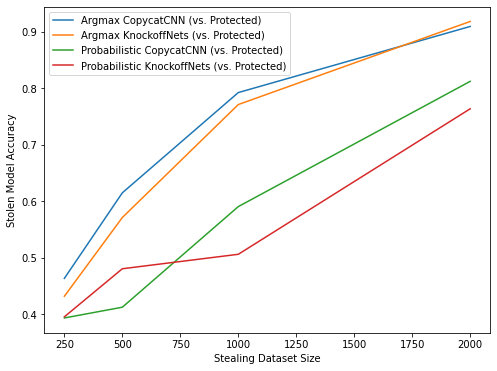

In [87]:
# gráfica el accuracy del modelo protegido, contra el tamaño del dataset 
df_protected = pd.DataFrame(results_protected, columns=('Method Name', 'Stealing Dataset Size', 'Accuracy'))
fig, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel("Stealing Dataset Size")
ax.set_ylabel("Stolen Model Accuracy")
for name, group in df_protected.groupby("Method Name"):
    group.plot(1, 2, ax=ax, label=name)
plt.show()

Como se observa en la grafica, en los atques probabilisticos, el ataque CopycatCNN tuvo una mejor accuracy que el KnockoffNets. Ahora bien, en los ataques no probabilisticos (argmax), los resultados son muy similares. Pero KnockoffNets es un poco mejor.

In [88]:
df_combined = pd.concat([df, df_protected]) # se agrupa la data robada de los modelos creados con diferentes metodos de ataque
groupby = df_combined.groupby("Method Name")

/var/folders/3q/f_c12djx2yxc8v2vq4255gcm0000gn/T/ipykernel_1522/3763360729.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


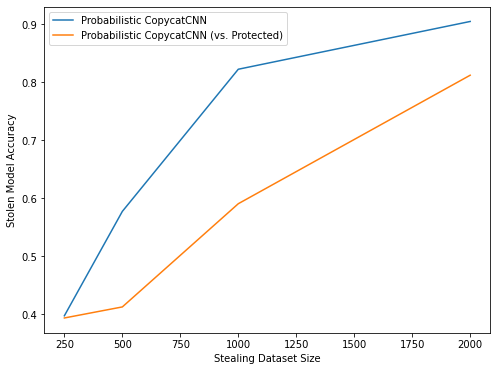

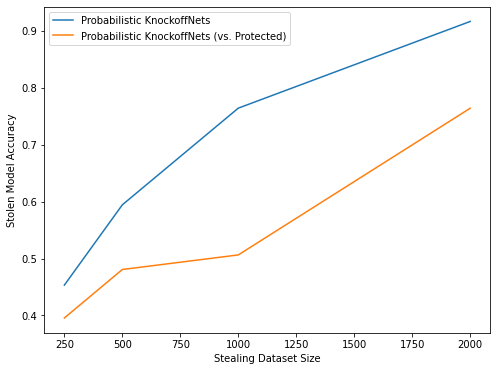

In [89]:
names = ["CopycatCNN", "KnockoffNets"] # metodos de ataques usados
for name in names:
    fig, ax = plt.subplots(figsize=(8,6))
    groupby.get_group("Probabilistic " + name).plot(1, 2,ax = ax, label = "Probabilistic " + name)
    groupby.get_group("Probabilistic " + name + " (vs. Protected)").plot(1,2,ax=ax, label="Probabilistic " + name + " (vs. Protected)")
    ax.set_xlabel("Stealing Dataset Size")
    ax.set_ylabel("Stolen Model Accuracy")
    fig.show()

Se puede observar que en los dos casos de ataques, el accuracy del modelo baja considerablemente con la capa de proteccion. En el caso de CopycatCNN baja de 0.9 aprox hasta 0.8 aprox. Y en KnockoffNets, baja de mas de 0.9 aprox hasta 0.75 aprox. Esto es un comportamiento totalmente esperado. 